<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_11***


---


#Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

download Dataset for Predict load eligibilty Decision Tree

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

In [200]:
df = pd.read_csv("/content/Training Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [201]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [202]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [203]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [204]:
df.shape

(614, 13)

In [205]:
df.size

7982

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [207]:
df.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [208]:
df.min()

Loan_ID              LP001002
Education            Graduate
ApplicantIncome           150
CoapplicantIncome           0
LoanAmount                  9
Loan_Amount_Term           12
Credit_History              0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [209]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [210]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [211]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [212]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


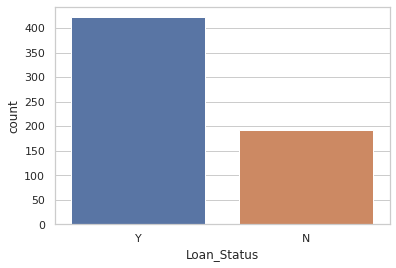

In [213]:
sns.countplot(df['Loan_Status'],label="Count")

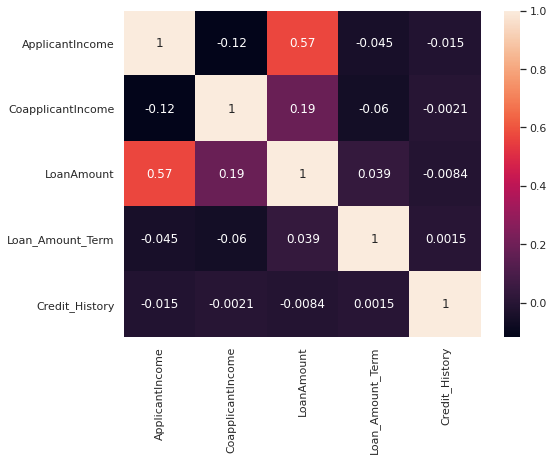

In [214]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [215]:
new_df = df.fillna(
    {
        'LoanAmount': 0,
        'Self_Employed': 'No'
    }
)
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [216]:
df_encoded = pd.get_dummies(new_df,drop_first=True )
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001052,Loan_ID_LP001066,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001095,Loan_ID_LP001097,Loan_ID_LP001098,Loan_ID_LP001100,Loan_ID_LP001106,...,Loan_ID_LP002912,Loan_ID_LP002916,Loan_ID_LP002917,Loan_ID_LP002925,Loan_ID_LP002926,Loan_ID_LP002928,Loan_ID_LP002931,Loan_ID_LP002933,Loan_ID_LP002936,Loan_ID_LP002938,Loan_ID_LP002940,Loan_ID_LP002941,Loan_ID_LP002943,Loan_ID_LP002945,Loan_ID_LP002948,Loan_ID_LP002949,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002958,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,0.0,360.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Splitting of dataset into dependent and independent variables

In [217]:
x = df_encoded.drop(columns="Loan_Status_Y")
y = df_encoded["Loan_Status_Y"]

In [218]:
print(x)
print(y)

     ApplicantIncome  ...  Property_Area_Urban
0               5849  ...                    1
1               4583  ...                    0
2               3000  ...                    1
3               2583  ...                    1
4               6000  ...                    1
..               ...  ...                  ...
609             2900  ...                    0
610             4106  ...                    0
611             8072  ...                    1
612             7583  ...                    1
613             4583  ...                    0

[614 rows x 628 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8


# Splitting the data in Training and Testing

In [219]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3)

In [220]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(xtrain)

In [221]:
xtrain = imp_train.transform(xtrain)
xtest_imp = imp_train.transform(xtest)

# Decission Tree

In [222]:
clf = DecisionTreeClassifier(random_state=5)

In [223]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

# Prediction

In [224]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

# Accuracy

In [225]:
y_pred = clf.predict(xtrain)
print("Training Dataset Accuracy=", accuracy_score(ytrain, y_pred))

Training Dataset Accuracy= 1.0


In [226]:
print("Training Data F1 Accuracy=", f1_score(ytrain, y_pred))

Training Data F1 Accuracy= 1.0


In [227]:
print("Validation Mean F1 score", 
      cross_val_score(clf, xtrain, ytrain, cv=5,scoring='f1_macro').mean())

Validation Mean F1 score 0.6679364804493828


In [228]:
print("Validation Mean Accuracy", 
      cross_val_score(clf, xtrain, ytrain, cv=5,scoring='accuracy').mean())

Validation Mean Accuracy 0.7224897400820793


[Text(153.45000000000002, 190.26, 'X[4] <= 0.418\ngini = 0.45\nsamples = 429\nvalue = [147, 282]'),
 Text(83.7, 135.9, 'X[457] <= 0.5\ngini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(55.800000000000004, 81.53999999999999, 'X[1] <= 6981.5\ngini = 0.089\nsamples = 64\nvalue = [61, 3]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.061\nsamples = 63\nvalue = [61, 2]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 135.9, 'X[1] <= 9650.5\ngini = 0.361\nsamples = 364\nvalue = [86, 278]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 17.0\ngini = 0.352\nsamples = 359\nvalue = [82, 277]'),
 Text(139.5, 27.180000000000007, 'gini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(195.3, 27.180000000000007, 'gini = 0.34\nsamples = 346\nvalue = [75, 271]'),
 Text(279.0, 81.53999999999999, 'X[406] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]')

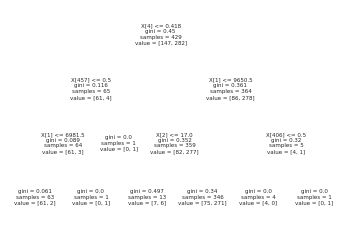

In [229]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(xtrain, ytrain)
tree.plot_tree(clf_tree)

In [230]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_4 <= 0.42
|   |--- feature_457 <= 0.50
|   |   |--- feature_1 <= 6981.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  6981.50
|   |   |   |--- class: 1
|   |--- feature_457 >  0.50
|   |   |--- class: 1
|--- feature_4 >  0.42
|   |--- feature_1 <= 9650.50
|   |   |--- feature_2 <= 17.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  17.00
|   |   |   |--- class: 1
|   |--- feature_1 >  9650.50
|   |   |--- feature_406 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_406 >  0.50
|   |   |   |--- class: 1



# Confusion Matrix

In [231]:
clf_tree.fit(xtrain, ytrain)
ypred = clf_tree.predict(xtest_imp)
print("Test Accuracy=", accuracy_score(ytest, ypred))
print("Test F1 score=", f1_score(ytest, ypred))

Test Accuracy= 0.8162162162162162
Test F1 score= 0.8851351351351352


In [232]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[ 20,  25],
       [  9, 131]])

Text(0.5, 257.44, 'Predicted label')

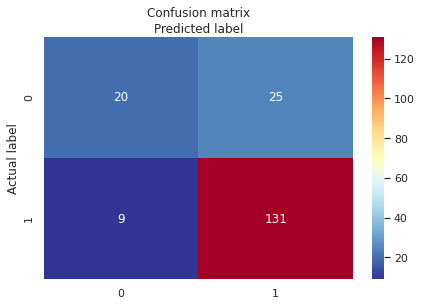

In [233]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlBu_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')